In [36]:
import pandas as pd

data = pd.read_csv("electric_vehicle_charging_station_list.csv")

In [2]:
data.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          202 non-null    int64  
 1   region      202 non-null    object 
 2   address     202 non-null    object 
 3   aux addres  202 non-null    object 
 4   latitude    202 non-null    float64
 5   longitude   202 non-null    float64
 6   type        202 non-null    object 
 7   power       202 non-null    object 
 8   service     202 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.3+ KB


In [10]:
# 1. Lets check where these EV stations are present in india
import folium

longitude = data['longitude'].values
latitude = data['latitude'].values

map = folium.Map(location=[latitude[0], longitude[0]], zoom_start=4)

for lat, lon in zip(latitude, longitude):
    folium.Marker(location=[lat, lon]).add_to(map)

map


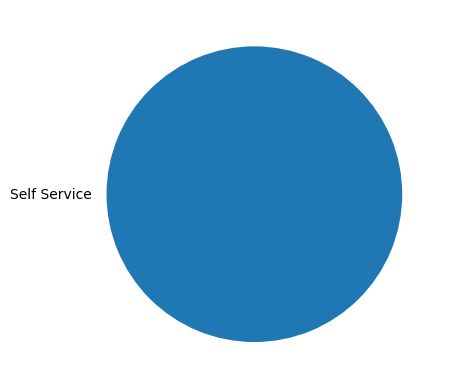

In [14]:
# 2. Lets see if most of the stations are self services or not
data['service'].unique()
# all of the stations are self serviced

import matplotlib.pyplot as plt
value_count = data['service'].value_counts()
x = value_count.index
y = value_count.values

plt.pie(y, labels=x)
plt.show()

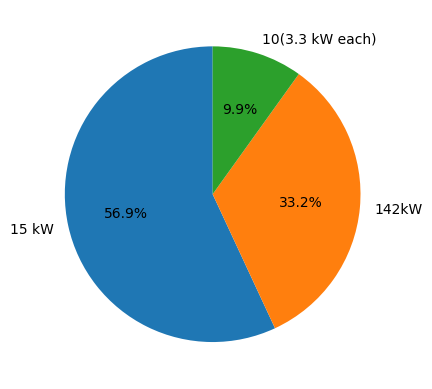

In [19]:
data['power'].unique()
# all of the stations are self serviced

import matplotlib.pyplot as plt
value_count = data['power'].value_counts()
x = value_count.index
y = value_count.values

plt.pie(y, labels=x, autopct="%1.1f%%", startangle=90)
plt.show()

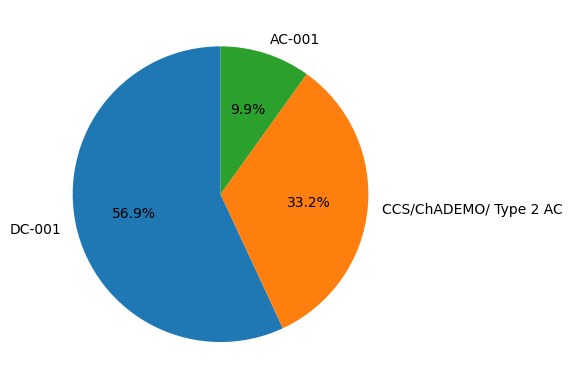

In [21]:
data['type'].unique()
# all of the stations are self serviced

import matplotlib.pyplot as plt
value_count = data['type'].value_counts()
x = value_count.index
y = value_count.values

plt.pie(y, labels=x, autopct="%1.1f%%", startangle=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

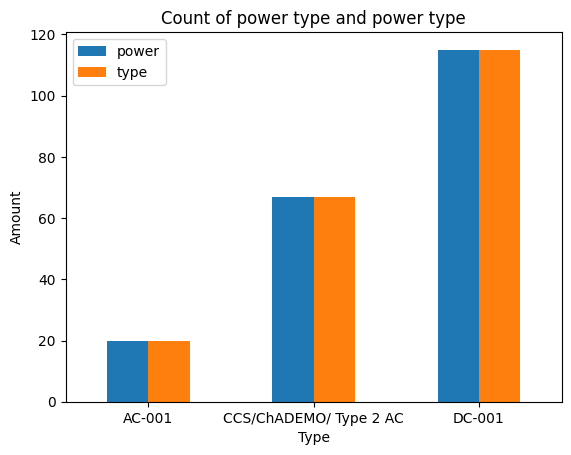

In [25]:
# 3. Lets see the count of power type with the "type" column
grouped_df = data.groupby('type').agg({'power': 'count', 'type': 'count'})
# Plot the average salary and average car price for each marital status
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.title('Count of power type and power type')
plt.xlabel('Type')
plt.ylabel('Amount')
plt.legend(['power', 'type'])
plt.xticks(rotation=0)
plt.show()

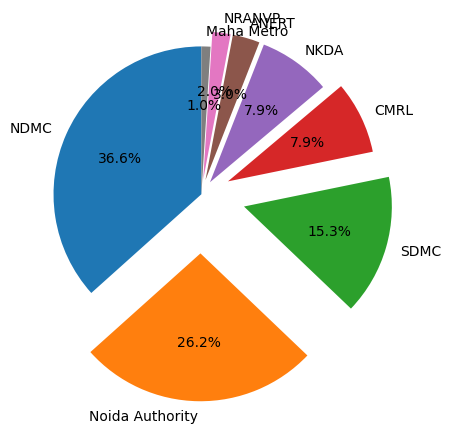

In [34]:

import matplotlib.pyplot as plt
value_count = data['region'].value_counts()
x = value_count.index
y = value_count.values
explode = [0.1 if size == max(y) else 0 for size in y]
plt.pie(y, labels=x, autopct="%1.1f%%", startangle=90, explode=[0, 0.4, 0.3, 0.2, 0.1, 0.1, 0.1, 0])
plt.show()

In [41]:
# 4. Lets see the power type of charging station location wise
import folium

location_wise = []

for i in range(len(data)):
    location_wise.append({'category': data.iloc[i]['power'], 'latitude':data.iloc[i]['latitude'],'longitude': data.iloc[i]['longitude']})

map = folium.Map(location=[location_wise[0]['latitude'], location_wise[0]['longitude']], zoom_start=4)

category_icons = {
    '15 kW': 'cloud',
    '10(3.3 kW each)': 'star',
    '142kW': 'circle'
}

for point in location_wise:
    lat = point['latitude']
    lon = point['longitude']
    cat = point['category']
    icon = folium.Icon(icon=category_icons[cat], prefix='fa', color='blue')
    folium.Marker(location=[lat, lon], icon=icon).add_to(map)
    folium.Marker(location=[lat, lon], icon=folium.DivIcon(html=f'<div style="font-weight: bold">{cat}</div>')).add_to(map)


map


In [43]:
#5. Lets see type location wise
# 4. Lets see the power type of charging station location wise
import folium

location_wise = []

for i in range(len(data)):
    location_wise.append({'category': data.iloc[i]['type'], 'latitude':data.iloc[i]['latitude'],'longitude': data.iloc[i]['longitude']})

map = folium.Map(location=[location_wise[0]['latitude'], location_wise[0]['longitude']], zoom_start=4)

category_icons = {
    'DC-001': 'cloud',
    'AC-001': 'star',
    'CCS/ChADEMO/ Type 2 AC': 'circle'
}

for point in location_wise:
    lat = point['latitude']
    lon = point['longitude']
    cat = point['category']
    icon = folium.Icon(icon=category_icons[cat], prefix='fa', color='blue')
    folium.Marker(location=[lat, lon], icon=icon).add_to(map)
    folium.Marker(location=[lat, lon], icon=folium.DivIcon(html=f'<div style="font-weight: bold">{cat}</div>')).add_to(map)


map

In [42]:
data['type'].unique()

array(['DC-001', 'AC-001', 'CCS/ChADEMO/ Type 2 AC'], dtype=object)